In [ ]:
!pip install opencv-python
!pip install matplotlib

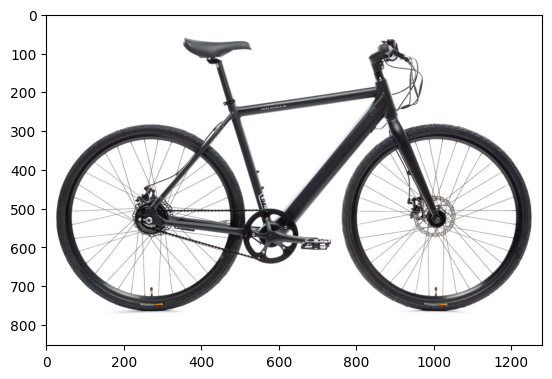

In [ ]:
import cv2
from matplotlib import pyplot as plt


# Opening image
img = cv2.imread("image.jpg")

# OpenCV opens images as BRG
# but we want it as RGB and
# we also need a grayscale
# version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Creates the environment
# of the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/fer'

In [ ]:
config_file = f'/content/gdrive/MyDrive/fer/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = f'/content/gdrive/MyDrive/fer/frozen_inference_graph.pb'

In [ ]:
model = cv2.dnn.DetectionModel(frozen_model,config_file)

In [ ]:
class_labels = []
file_name = '/content/gdrive/MyDrive/fer/labels.txt'
with open(file_name) as fpl:
  class_labels = fpl.read().rstrip('\n').split('\n')

In [ ]:
class_labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x79a3caf065d0>

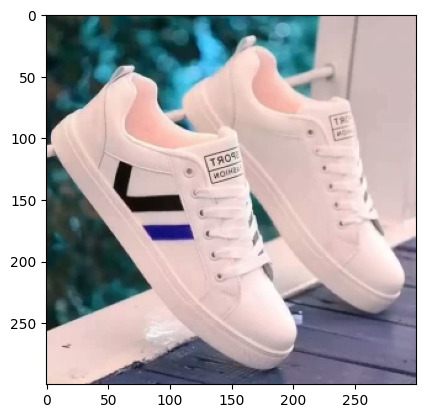

In [ ]:
img = cv2.imread('image.png')
plt.imshow(img)

In [ ]:
ClassIndex,confidece,bbox = model.detect(img,confThreshold=0.5)

In [ ]:
index=ClassIndex[0]-1

In [ ]:
class_labels[index]

'aeroplane'

In [ ]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0,),2)
  cv2.putText(img,class_labels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

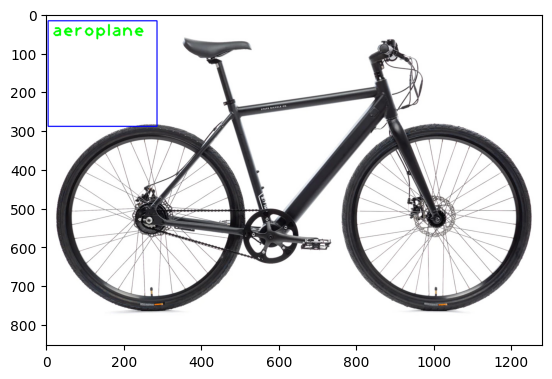

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
# Clone the Darknet repository
!git clone https://github.com/AlexeyAB/darknet.git

# Change directory to the Darknet folder
%cd darknet

# Check CUDA version on Colab
!nvcc --version

# Modify the Makefile to enable GPU and OpenCV
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

# Compile Darknet
!make

# Download pre-trained YOLOv4 weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# Function to perform object detection using YOLOv4
def run_darknet(image_path, output_path='predictions.jpg'):
    !./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights {image_path} -dont_show -out {output_path}

# Download an example image for testing
!wget https://github.com/AlexeyAB/darknet/blob/master/data/dog.jpg?raw=true -O dog.jpg


Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.39 MiB | 12.01 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.
/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, 

In [ ]:
# Run YOLOv4 on the example image
run_darknet('/content/image.jpg')

# Display the output
from IPython.display import Image
Image(filename='predictions.jpg')


./darknet: error while loading shared libraries: libcuda.so.1: cannot open shared object file: No such file or directory


FileNotFoundError: ignored

In [ ]:
from __future__ import division

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import cv2
import tensorflow as tf

def unique(tensor):
    tensor_np = tensor.cpu().numpy()
    unique_np = np.unique(tensor_np)
    unique_tensor = torch.from_numpy(unique_np)

    tensor_res = tensor.new(unique_tensor.shape)
    tensor_res.copy_(unique_tensor)
    return tensor_res


def bbox_iou(box1, box2):
    """
    Returns the IoU of two bounding boxes


    """
    #Get the coordinates of bounding boxes
    b1_x1, b1_y1, b1_x2, b1_y2 = box1[:,0], box1[:,1], box1[:,2], box1[:,3]
    b2_x1, b2_y1, b2_x2, b2_y2 = box2[:,0], box2[:,1], box2[:,2], box2[:,3]

    #get the corrdinates of the intersection rectangle
    inter_rect_x1 =  torch.max(b1_x1, b2_x1)
    inter_rect_y1 =  torch.max(b1_y1, b2_y1)
    inter_rect_x2 =  torch.min(b1_x2, b2_x2)
    inter_rect_y2 =  torch.min(b1_y2, b2_y2)

    #Intersection area
    inter_area = torch.clamp(inter_rect_x2 - inter_rect_x1 + 1, min=0) * torch.clamp(inter_rect_y2 - inter_rect_y1 + 1, min=0)

    #Union Area
    b1_area = (b1_x2 - b1_x1 + 1)*(b1_y2 - b1_y1 + 1)
    b2_area = (b2_x2 - b2_x1 + 1)*(b2_y2 - b2_y1 + 1)

    iou = inter_area / (b1_area + b2_area - inter_area)

    return iou

def predict_transform(prediction, inp_dim, anchors, num_classes, CUDA = True):


    batch_size = prediction.size(0)
    stride =  inp_dim // prediction.size(2)
    grid_size = inp_dim // stride
    bbox_attrs = 5 + num_classes
    num_anchors = len(anchors)
    #print("PRED BEF TR ",prediction[:,:,0],prediction[:,:,1],prediction[:,:,4])
    prediction = prediction.view(batch_size, bbox_attrs*num_anchors, grid_size*grid_size)
    prediction = prediction.transpose(1,2).contiguous()
    prediction = prediction.view(batch_size, grid_size*grid_size*num_anchors, bbox_attrs)
    anchors = [(a[0]/stride, a[1]/stride) for a in anchors]

    #Sigmoid the  centre_X, centre_Y. and object confidencce
    prediction[:,:,0] = torch.sigmoid(prediction[:,:,0])
    prediction[:,:,1] = torch.sigmoid(prediction[:,:,1])
    prediction[:,:,4] = torch.sigmoid(prediction[:,:,4])

    #Add the center offsets
    grid = np.arange(grid_size)
    a,b = np.meshgrid(grid, grid)

    x_offset = torch.FloatTensor(a).view(-1,1)
    y_offset = torch.FloatTensor(b).view(-1,1)

    if CUDA:
        x_offset = x_offset.cuda()
        y_offset = y_offset.cuda()

    x_y_offset = torch.cat((x_offset, y_offset), 1).repeat(1,num_anchors).view(-1,2).unsqueeze(0)
    pred_old = prediction.clone() #1
    prediction[:,:,:2] += x_y_offset

    #log space transform height and the width
    anchors = torch.FloatTensor(anchors)

    if CUDA:
        anchors = anchors.cuda()
    #pred_old = prediction.clone() #1
    anchors = anchors.repeat(grid_size*grid_size, 1).unsqueeze(0)
    prediction[:,:,2:4] = torch.exp(prediction[:,:,2:4])*anchors
    pred_old[:,:,2:4] = torch.exp(pred_old[:,:,2:4])*anchors

    prediction[:,:,5: 5 + num_classes] = torch.sigmoid((prediction[:,:, 5 : 5 + num_classes]))
    pred_old[:,:,5: 5 + num_classes] = torch.sigmoid((pred_old[:,:, 5 : 5 + num_classes]))
    prediction[:,:,:4] *= stride

    return prediction, pred_old

def write_results(prediction, confidence, num_classes, nms = True, nms_conf = 0.4):
    conf_mask = (prediction[:,:,4] > confidence).float().unsqueeze(2)
    prediction = prediction * conf_mask

    try:
        ind_nz = torch.nonzero(prediction[:,:,4]).transpose(0,1).contiguous()
    except:
        return 0
    box_corner = prediction.new(prediction.shape)
    box_corner[:,:,0] = (prediction[:,:,0] - prediction[:,:,2]/2)
    box_corner[:,:,1] = (prediction[:,:,1] - prediction[:,:,3]/2)
    box_corner[:,:,2] = (prediction[:,:,0] + prediction[:,:,2]/2)
    box_corner[:,:,3] = (prediction[:,:,1] + prediction[:,:,3]/2)
    prediction[:,:,:4] = box_corner[:,:,:4]

    batch_size = prediction.size(0)
    output = prediction.new(1, prediction.size(2) + 1)
    write = False


    for ind in range(batch_size):
        image_pred = prediction[ind]          #image Tensor
       #confidence threshholding
       #NMS

        max_conf, max_conf_score = torch.max(image_pred[:,5:5+ num_classes], 1)
        max_conf = max_conf.float().unsqueeze(1)
        max_conf_score = max_conf_score.float().unsqueeze(1)
        seq = (image_pred[:,:5], max_conf, max_conf_score)
        image_pred = torch.cat(seq, 1)

        non_zero_ind =  (torch.nonzero(image_pred[:,4]))
        image_pred_ = image_pred[non_zero_ind.squeeze(),:].view(-1,7)
        #Get the various classes detected in the image
        try:
            img_classes = unique(image_pred_[:,-1]) # -1 index holds the class index
        except:
            continue
        for cls in img_classes:
            #perform NMS
            #get the detections with one particular class
            cls_mask = image_pred_*(image_pred_[:,-1] == cls).float().unsqueeze(1)
            class_mask_ind = torch.nonzero(cls_mask[:,-2]).squeeze()
            image_pred_class = image_pred_[class_mask_ind].view(-1,7)

            #sort the detections such that the entry with the maximum objectness
            #confidence is at the top
            conf_sort_index = torch.sort(image_pred_class[:,4], descending = True )[1]
            image_pred_class = image_pred_class[conf_sort_index]
            idx = image_pred_class.size(0)   #Number of detections
            if nms:
                for i in range(idx):
                  #Get the IOUs of all boxes that come after the one we are looking at
                  #in the loop
                    try:
                        ious = bbox_iou(image_pred_class[i].unsqueeze(0), image_pred_class[i+1:])
                    except ValueError:
                        break
                    except IndexError:
                        break

                #Zero out all the detections that have IoU > treshhold
                    iou_mask = (ious < nms_conf).float().unsqueeze(1)
                    image_pred_class[i+1:] *= iou_mask

                #Remove the non-zero entries
                    non_zero_ind = torch.nonzero(image_pred_class[:,4]).squeeze()
                    image_pred_class = image_pred_class[non_zero_ind].view(-1,7)

            batch_ind = image_pred_class.new(image_pred_class.size(0), 1).fill_(ind)      #Repeat the batch_id for as many detections of the class cls in the image
            seq = batch_ind, image_pred_class

            if not write:
                output = torch.cat(seq,1)
                write = True
            else:
                out = torch.cat(seq,1)
                output = torch.cat((output,out))
    #batch_id,4 coordinates, max_conf, max_conf_score, object id
    return output

def letterbox_image(img, inp_dim):
    '''resize image with unchanged aspect ratio using padding'''
    img_w, img_h = img.shape[1], img.shape[0]
    w, h = inp_dim
    new_w = int(img_w * min(w/img_w, h/img_h))
    new_h = int(img_h * min(w/img_w, h/img_h))
    resized_image = cv2.resize(img, (new_w,new_h), interpolation = cv2.INTER_CUBIC)

    canvas = np.full((inp_dim[1], inp_dim[0], 3), 128)

    canvas[(h-new_h)//2:(h-new_h)//2 + new_h,(w-new_w)//2:(w-new_w)//2 + new_w,  :] = resized_image

    return canvas

def prep_image(img, inp_dim):
    """
    Prepare image for inputting to the neural network.

    Returns a Variable
    """
    orig_im = cv2.imread(img)
    dim = orig_im.shape[1], orig_im.shape[0]
    img = (letterbox_image(orig_im, (inp_dim, inp_dim)))
    img = img[:,:,::-1].transpose((2,0,1)).copy()
    img = torch.from_numpy(img).float().div(255.0).unsqueeze(0)
    return img, orig_im, dim

In [ ]:
f = open("../input/class-labels-500/class-descriptions-500.csv","r")
d_class_label = {}
for rec in f:
    line = rec.split(",")
    d_class_label[line[1][:-1].lower()] = line[0]
d_class_label["remote control"] = "/m/0qjjc"
d_class_label["frisbee"] = "/m/0df_n8"
print(d_class_label)

In [ ]:
model = Darknet("../input/yolov3cfg/yolov3.cfg")
inp = get_test_input("../input/google-ai-open-images-object-detection-track/test/challenge2018_test/00001a21632de752.jpg",416)
#print(inp)
pred = model(inp, torch.cuda.is_available())
print ("Pred..",pred)
#f = open("ouput.csv","w")
#print (pred)

model = Darknet("../input/yolov3cfg/yolov3.cfg")
model.load_weights("../input/yolov3-weights/yolov3.weights")

In [1]:
!pip install pycocotools

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import json
import random
import cv2

from tensorflow.keras import regularizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Concatenate
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

from pycocotools.coco import COCO

In [ ]:
# Path of folder
val_folder = '/kaggle/input/coco2017/val2017/'
test_folder = '/kaggle/input/coco2017/test2017/'
train_folder = '/kaggle/input/coco2017/train2017/'
annotations_train_file = '/kaggle/input/coco2017/annotations/instances_train2017.json'


def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if file.endswith('.jpg')])

num_val_images = count_images(val_folder)
num_test_images = count_images(test_folder)
num_train_images = count_images(train_folder)


print(f'Number of images in the folder val2017 : {num_val_images}')
print(f'Number of images in the folder test2017 : {num_test_images}')
print(f'Number of images in the folder train2017 : {num_train_images}')

# Print 3 images of the folder train2017
train_images = os.listdir(train_folder)[:3]
for image in train_images:
    image_path = os.path.join(train_folder, image)
    print(image_path)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.show()

In [2]:
# Importing the 'drive' module from the 'google.colab' library
from google.colab import drive

# Mounting the Google Drive to the '/gdrive' directory
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# Defining the path to the Kaggle directory on Google Drive
path = "/content/drive/MyDrive/Kaggle"

# Importing the 'os' module
import os

# Setting the 'KAGGLE_CONFIG_DIR' environment variable to the specified path
os.environ['KAGGLE_CONFIG_DIR'] = path

In [4]:
%cd "/content/drive/MyDrive/Kaggle"

[Errno 2] No such file or directory: '/content/drive/MyDrive/Kaggle'
/content


In [6]:
!kaggle datasets download -d awsaf49/coco-2017-dataset

  7% 1.78G/25.0G [01:32<20:03, 20.8MB/s]
User cancelled operation


In [13]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: coco2017/val2017/000000000139.jpg  
  inflating: coco2017/val2017/000000000285.jpg  
  inflating: coco2017/val2017/000000000632.jpg  
  inflating: coco2017/val2017/000000000724.jpg  
  inflating: coco2017/val2017/000000000776.jpg  
  inflating: coco2017/val2017/000000000785.jpg  
  inflating: coco2017/val2017/000000000802.jpg  
  inflating: coco2017/val2017/000000000872.jpg  
  inflating: coco2017/val2017/000000000885.jpg  
  inflating: coco2017/val2017/000000001000.jpg  
  inflating: coco2017/val2017/000000001268.jpg  
  inflating: coco2017/val2017/000000001296.jpg  
  inflating: coco2017/val2017/000000001353.jpg  
  inflating: coco2017/val2017/000000001425.jpg  
  inflating: coco2017/val2017/000000001490.jpg  
  inflating: coco2017/val2017/000000001503.jpg  
  inflating: coco2017/val2017/000000001532.jpg  
  inflating: coco2017/val2017/000000001584.jpg  
  inflating: coco2017/val2017/000000001675.jpg  
  inflating: coco2

Number of images in the folder val2017 : 5000
Number of images in the folder test2017 : 40670
Number of images in the folder train2017 : 118287
/content/drive/MyDrive/Kaggle/coco2017/train2017/000000199243.jpg


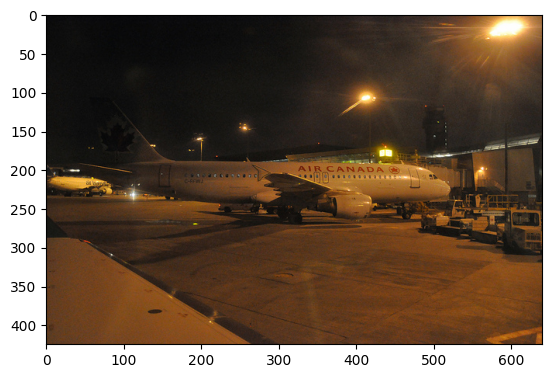

/content/drive/MyDrive/Kaggle/coco2017/train2017/000000011256.jpg


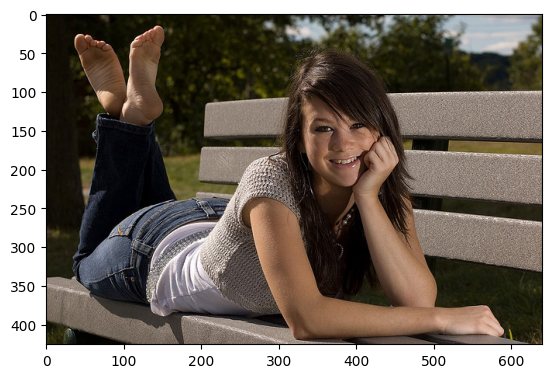

/content/drive/MyDrive/Kaggle/coco2017/train2017/000000135914.jpg


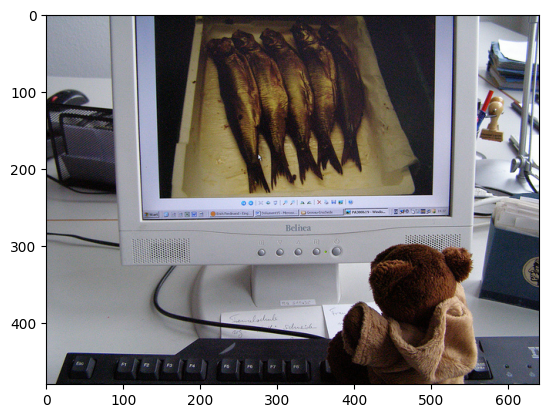

In [16]:
# Path of folder
val_folder = '/content/drive/MyDrive/Kaggle/coco2017/val2017'
test_folder = '/content/drive/MyDrive/Kaggle/coco2017/test2017'
train_folder = '/content/drive/MyDrive/Kaggle/coco2017/train2017'
annotations_train_file = '/content/drive/MyDrive/Kaggle/coco2017/annotations/instances_train2017.json'


def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if file.endswith('.jpg')])

num_val_images = count_images(val_folder)
num_test_images = count_images(test_folder)
num_train_images = count_images(train_folder)


print(f'Number of images in the folder val2017 : {num_val_images}')
print(f'Number of images in the folder test2017 : {num_test_images}')
print(f'Number of images in the folder train2017 : {num_train_images}')

# Print 3 images of the folder train2017
train_images = os.listdir(train_folder)[:3]
for image in train_images:
    image_path = os.path.join(train_folder, image)
    print(image_path)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.show()

In [17]:
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

annotations_data = load_annotations(annotations_train_file)

categories = annotations_data['categories']
print(f'Number of categories : {len(categories)}')
print('Categories of object :')
for category in categories:
    print(f"ID : {category['id']}, Name : {category['name']}")

# Obtenir des informations sur les images et les annotations dans le dossier train2017
images = annotations_data['images']
annotations = annotations_data['annotations']
print(f'Number of images in annotations : {len(images)}')
print(f'Number of annotations: {len(annotations)}')

print('Informations abour 3 images in the folder train2017 :')
for image_info in images[:3]:
    image_id = image_info['id']
    image_file_name = image_info['file_name']
    num_annotations = len([anno for anno in annotations if anno['image_id'] == image_id])
    print(f'Name of the file : {image_file_name}, ID of the image : {image_id}, Number of annotations : {num_annotations}')

Number of categories : 80
Categories of object :
ID : 1, Name : person
ID : 2, Name : bicycle
ID : 3, Name : car
ID : 4, Name : motorcycle
ID : 5, Name : airplane
ID : 6, Name : bus
ID : 7, Name : train
ID : 8, Name : truck
ID : 9, Name : boat
ID : 10, Name : traffic light
ID : 11, Name : fire hydrant
ID : 13, Name : stop sign
ID : 14, Name : parking meter
ID : 15, Name : bench
ID : 16, Name : bird
ID : 17, Name : cat
ID : 18, Name : dog
ID : 19, Name : horse
ID : 20, Name : sheep
ID : 21, Name : cow
ID : 22, Name : elephant
ID : 23, Name : bear
ID : 24, Name : zebra
ID : 25, Name : giraffe
ID : 27, Name : backpack
ID : 28, Name : umbrella
ID : 31, Name : handbag
ID : 32, Name : tie
ID : 33, Name : suitcase
ID : 34, Name : frisbee
ID : 35, Name : skis
ID : 36, Name : snowboard
ID : 37, Name : sports ball
ID : 38, Name : kite
ID : 39, Name : baseball bat
ID : 40, Name : baseball glove
ID : 41, Name : skateboard
ID : 42, Name : surfboard
ID : 43, Name : tennis racket
ID : 44, Name : bott

In [18]:
annotations_by_category = {category['name']: 0 for category in categories}
for annotation in annotations:
    category_id = annotation['category_id']
    category_name = next((cat['name'] for cat in categories if cat['id'] == category_id), 'Unkwnon')
    annotations_by_category[category_name] += 1

print('Number of annotations by categories :')
for category, count in annotations_by_category.items():
    print(f'  {category}: {count}')

Number of annotations by categories :
  person: 262465
  bicycle: 7113
  car: 43867
  motorcycle: 8725
  airplane: 5135
  bus: 6069
  train: 4571
  truck: 9973
  boat: 10759
  traffic light: 12884
  fire hydrant: 1865
  stop sign: 1983
  parking meter: 1285
  bench: 9838
  bird: 10806
  cat: 4768
  dog: 5508
  horse: 6587
  sheep: 9509
  cow: 8147
  elephant: 5513
  bear: 1294
  zebra: 5303
  giraffe: 5131
  backpack: 8720
  umbrella: 11431
  handbag: 12354
  tie: 6496
  suitcase: 6192
  frisbee: 2682
  skis: 6646
  snowboard: 2685
  sports ball: 6347
  kite: 9076
  baseball bat: 3276
  baseball glove: 3747
  skateboard: 5543
  surfboard: 6126
  tennis racket: 4812
  bottle: 24342
  wine glass: 7913
  cup: 20650
  fork: 5479
  knife: 7770
  spoon: 6165
  bowl: 14358
  banana: 9458
  apple: 5851
  sandwich: 4373
  orange: 6399
  broccoli: 7308
  carrot: 7852
  hot dog: 2918
  pizza: 5821
  donut: 7179
  cake: 6353
  chair: 38491
  couch: 5779
  potted plant: 8652
  bed: 4192
  dining ta

In [19]:
instances_train_path = '/content/drive/MyDrive/Kaggle/coco2017/annotations/instances_train2017.json'
coco = COCO(instances_train_path)
image_ids = coco.getImgIds()

# Number of images to display
num_images_to_display = 5
images_displayed = 0

for image_id in image_ids:
    # Retrieving annotations (instances) corresponding to the specific image
    annotation_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(annotation_ids)

    # Retrieving categories for each annotation of the image
    categories = [coco.loadCats(annotation['category_id'])[0]['name'] for annotation in annotations]

    print(f"Categories for image ID {image_id}: {categories}")

    images_displayed += 1

    if images_displayed >= num_images_to_display:
        break

loading annotations into memory...
Done (t=24.51s)
creating index...
index created!
Categories for image ID 391895: ['motorcycle', 'person', 'person', 'bicycle']
Categories for image ID 522418: ['person', 'knife', 'cake', 'sink']
Categories for image ID 184613: ['cow', 'cow', 'cow', 'cow', 'cow', 'umbrella', 'cow', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'cow', 'cow', 'cow', 'person']
Categories for image ID 318219: ['person', 'person', 'mouse', 'mouse', 'keyboard', 'keyboard', 'mouse', 'tv', 'tv', 'tv', 'mouse']
Categories for image ID 554625: ['tv', 'tv', 'person', 'person', 'person', 'tv', 'mouse', 'mouse', 'keyboard', 'keyboard', 'keyboard', 'tv', 'mouse', 'mouse', 'person', 'person', 'tv', 'mouse', 'keyboard']


In [1]:
# List of ten categories
selected_categories = ['bicycle', 'knife', 'mouse', 'keyboard', 'tv', 'remote', 'baseball', 'refrigerator', 'book', 'teddy bear']
coco = COCO(instances_train_file_path)

image_ids = coco.getImgIds()
sampled_image_ids = random.sample(image_ids, k=60000)  # Desired number of randomly sampled images

# Initialize lists to store images and labels
train_images = []
train_labels = []

for image_id in sampled_image_ids:
    annotations_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(annotations_ids)
    categories = [coco.loadCats(annotation['category_id'])[0]['name'] for annotation in annotations]
    selected = False

    # Check if any of the selected categories are present in the image annotations
    for category_name in selected_categories:
        if category_name in categories:
            selected = True
            break

    if selected:
        img_name = f"{image_id:012d}.jpg"
        img_path = f"/kaggle/input/coco2017/train2017/{img_name}"

        # Check if the image file already exists locally
        if not os.path.exists(img_path):
            img_info = coco.loadImgs(image_id)[0]
            img_url = img_info['coco_url']
            image = tf.keras.utils.get_file(img_name, img_url)
        else:
            image = img_path

        image = tf.keras.preprocessing.image.load_img(image, target_size=(224, 224))
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = tf.keras.applications.resnet50.preprocess_input(image)
        train_images.append(image)

        label = [int(category in categories) for category in selected_categories]
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Create a classification model with ResNet50
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

# Add a dropout layer
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(len(selected_categories), activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with binary_crossentropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=4, batch_size=16, validation_split=0.2)
model.save('classification_model_selected_categories.keras')


NameError: ignored

In [1]:
!pip install transformers


In [3]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.8 MB/s eta 0:00:00


In [1]:
from transformers import AutoModelForObjectDetection, AutoTokenizer

model_name = "ciasimbaya/ObjectDetection"  # Replace with the actual model name
model = AutoModelForObjectDetection.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


model.safetensors:   0%|          | 0.00/179M [00:00<?, ?B/s]

Some weights of the model checkpoint at ciasimbaya/ObjectDetection were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


KeyError: ignored

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("object-detection", model="ciasimbaya/ObjectDetection")

Some weights of the model checkpoint at ciasimbaya/ObjectDetection were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [5]:
from transformers import pipeline

# Create an object detection pipeline
object_detection = pipeline("object-detection", model="ciasimbaya/ObjectDetection")

# Replace 'path/to/your/image.jpg' with the actual path to your input image
image_path = '/content/234933_RadicalJr.21_2_PRINT.jpg'

# Perform object detection
results = object_detection(image_path)

# Print the results
for result in results:
    print(f"Label: {result['label']}, Confidence: {result['score']:.2f}")
    print(f"Bbox: {result['box']}")
    print("\n")


Some weights of the model checkpoint at ciasimbaya/ObjectDetection were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Could not find image processor class in the image processor config or the model c

Label: tennis racket, Confidence: 1.00
Bbox: {'xmin': 286, 'ymin': 33, 'xmax': 708, 'ymax': 962}


